In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from random import sample
import random
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn import tree
from math import log,exp
from sklearn import preprocessing
from sklearn import utils

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('./E:/KhaiPhaDuLieu/Me/data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
spamEmail = pd.read_csv('./data/spam_email.csv')

spamEmail.head()

,make,address,all,3d,our,over,remove,internet,order,mail,...,semicol,paren,bracket,bang,dollar,pound,cap_avg,cap_long,cap_total,Class
0,0.00,0.00,0.29,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.178,0.0,0.044,0.000,0.00,1.666,10,180,ham
1,0.46,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.125,0.0,0.000,0.000,0.00,1.510,10,74,ham
2,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.000,0.000,0.00,1.718,11,55,ham
3,0.33,0.44,0.37,0.0,0.14,0.11,0.00,0.07,0.97,1.16,...,0.006,0.159,0.0,0.069,0.221,0.11,3.426,72,819,spam
4,0.00,2.08,0.00,0.0,3.12,0.00,1.04,0.00,0.00,0.00,...,0.000,0.000,0.0,0.263,0.000,0.00,1.428,4,20,spam


In [3]:
data = np.array(spamEmail.iloc[:, :-1])
data

array([[0.000e+00, 0.000e+00, 2.900e-01, ..., 1.666e+00, 1.000e+01,
        1.800e+02],
       [4.600e-01, 0.000e+00, 0.000e+00, ..., 1.510e+00, 1.000e+01,
        7.400e+01],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 1.718e+00, 1.100e+01,
        5.500e+01],
       ...,
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 1.000e+00, 1.000e+00,
        3.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 1.687e+00, 1.000e+01,
        2.700e+01],
       [1.300e-01, 2.600e-01, 5.200e-01, ..., 7.138e+00, 1.490e+02,
        1.235e+03]])

In [4]:
X = spamEmail[['make','address','all','3d','our', 'over', 'remove', 'internet', 'order','mail','receive','will','people','report','addresses','free'
               ,'business','email','you','credit','your','font','money','hp','hpl','george','650'
               ,'lab','labs','telnet','857','data','415','85','technology','1999','parts','pm','direct'
               ,'cs','meeting','original','project','re','edu','table','conference','semicol','paren','bracket'
               ,'bang','dollar','pound','cap_avg','cap_long','cap_total']]

X.head()

,make,address,all,3d,our,over,remove,internet,order,mail,...,conference,semicol,paren,bracket,bang,dollar,pound,cap_avg,cap_long,cap_total
0,0.00,0.00,0.29,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.178,0.0,0.044,0.000,0.00,1.666,10,180
1,0.46,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.125,0.0,0.000,0.000,0.00,1.510,10,74
2,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.000,0.0,0.000,0.000,0.00,1.718,11,55
3,0.33,0.44,0.37,0.0,0.14,0.11,0.00,0.07,0.97,1.16,...,0.0,0.006,0.159,0.0,0.069,0.221,0.11,3.426,72,819
4,0.00,2.08,0.00,0.0,3.12,0.00,1.04,0.00,0.00,0.00,...,0.0,0.000,0.000,0.0,0.263,0.000,0.00,1.428,4,20


In [5]:
y = spamEmail['Class']

y.head()

0     ham
1     ham
2     ham
3    spam
4    spam
Name: Class, dtype: object

In [6]:
example_SpamEmail = spamEmail[(spamEmail['Class'] == 'ham') | (spamEmail['Class'] == 'spam')]

In [7]:
example_SpamEmail.head()

,make,address,all,3d,our,over,remove,internet,order,mail,...,semicol,paren,bracket,bang,dollar,pound,cap_avg,cap_long,cap_total,Class
0,0.00,0.00,0.29,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.178,0.0,0.044,0.000,0.00,1.666,10,180,ham
1,0.46,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.125,0.0,0.000,0.000,0.00,1.510,10,74,ham
2,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.000,0.000,0.00,1.718,11,55,ham
3,0.33,0.44,0.37,0.0,0.14,0.11,0.00,0.07,0.97,1.16,...,0.006,0.159,0.0,0.069,0.221,0.11,3.426,72,819,spam
4,0.00,2.08,0.00,0.0,3.12,0.00,1.04,0.00,0.00,0.00,...,0.000,0.000,0.0,0.263,0.000,0.00,1.428,4,20,spam


In [8]:
example_SpamEmail['Label'] = example_SpamEmail['Class'].replace(to_replace = ['ham','spam'], value=[1,-1])

In [9]:
example_SpamEmail = example_SpamEmail.drop('Class', axis = 1)

In [10]:
example_SpamEmail['weight'] = 1/(example_SpamEmail.shape[0])

In [11]:
example_SpamEmail.head()

,make,address,all,3d,our,over,remove,internet,order,mail,...,paren,bracket,bang,dollar,pound,cap_avg,cap_long,cap_total,Label,weight
0,0.00,0.00,0.29,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.178,0.0,0.044,0.000,0.00,1.666,10,180,1,0.000217
1,0.46,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.125,0.0,0.000,0.000,0.00,1.510,10,74,1,0.000217
2,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.0,0.000,0.000,0.00,1.718,11,55,1,0.000217
3,0.33,0.44,0.37,0.0,0.14,0.11,0.00,0.07,0.97,1.16,...,0.159,0.0,0.069,0.221,0.11,3.426,72,819,-1,0.000217
4,0.00,2.08,0.00,0.0,3.12,0.00,1.04,0.00,0.00,0.00,...,0.000,0.0,0.263,0.000,0.00,1.428,4,20,-1,0.000217


In [12]:
random.seed(10)
example_SpamEmail_2 = example_SpamEmail.sample(len(example_SpamEmail), replace = True, weights = example_SpamEmail['weight'])
example_SpamEmail_2

,make,address,all,3d,our,over,remove,internet,order,mail,...,paren,bracket,bang,dollar,pound,cap_avg,cap_long,cap_total,Label,weight
2176,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,...,0.000,0.000,0.000,0.000,0.000,1.000,1,5,1,0.000217
2190,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,...,1.082,0.000,0.000,0.000,0.216,3.478,7,80,1,0.000217
1971,0.15,0.00,0.46,0.0,0.61,0.00,0.30,0.0,0.92,0.76,...,0.271,0.000,0.181,0.203,0.022,9.744,445,1257,-1,0.000217
1691,0.00,0.37,0.00,0.0,0.00,0.74,1.12,0.0,0.00,0.00,...,0.000,0.000,0.223,0.223,0.000,2.021,10,93,-1,0.000217
1585,0.00,0.00,0.34,0.0,0.00,0.00,0.34,0.0,0.00,0.34,...,0.393,0.000,0.224,0.056,0.000,2.257,17,158,-1,0.000217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2681,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,...,0.216,0.000,0.000,0.000,0.000,1.920,6,48,1,0.000217
2553,0.00,0.24,0.72,0.0,0.24,0.00,0.12,0.0,0.00,0.36,...,0.018,0.000,0.340,0.000,0.018,5.634,158,1234,-1,0.000217
3480,0.00,0.57,0.57,0.0,1.14,0.57,2.28,0.0,0.00,0.57,...,0.081,0.000,0.487,0.000,0.081,16.217,147,373,-1,0.000217
615,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,...,0.344,0.000,0.344,0.172,0.000,2.166,11,39,1,0.000217


In [13]:
X_train = example_SpamEmail_2.iloc[0:len(spamEmail),0:56]
y_train = example_SpamEmail_2.iloc[0:len(spamEmail),57]

[Text(0.5, 0.75, 'X[52] <= 0.056\ngini = 0.478\nsamples = 4601\nvalue = [1822, 2779]'),
 Text(0.25, 0.25, 'gini = 0.351\nsamples = 3444\nvalue = [782, 2662]'),
 Text(0.75, 0.25, 'gini = 0.182\nsamples = 1157\nvalue = [1040, 117]')]

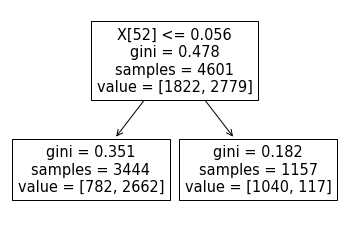

In [14]:
clfGini = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=1)
clf = clfGini.fit(X_train, y_train)
tree.plot_tree(clf)

In [15]:
#prediction
#Đưa test vào nên không lấy label
y_pred = clfGini.predict(example_SpamEmail.iloc[0:len(spamEmail),0:56])
y_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [16]:
#adding a column weight after the first round of boosting
example_SpamEmail['PredictionClass'] = y_pred
example_SpamEmail

,make,address,all,3d,our,over,remove,internet,order,mail,...,bracket,bang,dollar,pound,cap_avg,cap_long,cap_total,Label,weight,PredictionClass
0,0.00,0.00,0.29,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.044,0.000,0.00,1.666,10,180,1,0.000217,1
1,0.46,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.000,0.00,1.510,10,74,1,0.000217,1
2,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.000,0.00,1.718,11,55,1,0.000217,1
3,0.33,0.44,0.37,0.0,0.14,0.11,0.00,0.07,0.97,1.16,...,0.0,0.069,0.221,0.11,3.426,72,819,-1,0.000217,-1
4,0.00,2.08,0.00,0.0,3.12,0.00,1.04,0.00,0.00,0.00,...,0.0,0.263,0.000,0.00,1.428,4,20,-1,0.000217,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.00,0.00,0.53,0.0,0.00,0.53,0.00,0.00,0.00,0.53,...,0.0,0.000,0.000,0.00,1.857,16,52,1,0.000217,1
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.221,0.665,0.00,3.812,15,61,-1,0.000217,-1
4598,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.000,0.00,1.000,1,3,1,0.000217,1
4599,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.218,0.000,0.00,1.687,10,27,1,0.000217,1


In [17]:
#misclassified = 0 if the label and prediction are same
#Phân biệt cây học yếu với cây học mạnh
example_SpamEmail.loc[example_SpamEmail.Label != example_SpamEmail.PredictionClass, 'misclassification'] = 1
example_SpamEmail.loc[example_SpamEmail.Label == example_SpamEmail.PredictionClass, 'misclassification'] = 0

In [18]:
#error calculation
error1 = sum(example_SpamEmail['misclassification'] * example_SpamEmail['weight'])
error1

0.2062595088024379

In [19]:
#calculation of alpha (performance)
#error không bao giờ vượt quá 1
alpha1 = 0.5*log((1-error1)/error1)
alpha1

0.6738107215524545

In [20]:
#update weight
newWeight = example_SpamEmail['weight']*np.exp(-1*alpha1*example_SpamEmail['Label']*example_SpamEmail['PredictionClass'])

In [21]:
#normalized weight
z = sum(newWeight)
normalizedWeight = newWeight/sum(newWeight)

In [22]:
#Update trọng số mới và tập dữ liệu
#4 là lấy 4 số sau dấu phẩy
example_SpamEmail['newWeight'] = round(normalizedWeight,4)
example_SpamEmail

,make,address,all,3d,our,over,remove,internet,order,mail,...,dollar,pound,cap_avg,cap_long,cap_total,Label,weight,PredictionClass,misclassification,newWeight
0,0.00,0.00,0.29,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.00,1.666,10,180,1,0.000217,1,0.0,0.0001
1,0.46,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.00,1.510,10,74,1,0.000217,1,0.0,0.0001
2,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.00,1.718,11,55,1,0.000217,1,0.0,0.0001
3,0.33,0.44,0.37,0.0,0.14,0.11,0.00,0.07,0.97,1.16,...,0.221,0.11,3.426,72,819,-1,0.000217,-1,0.0,0.0001
4,0.00,2.08,0.00,0.0,3.12,0.00,1.04,0.00,0.00,0.00,...,0.000,0.00,1.428,4,20,-1,0.000217,1,1.0,0.0005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.00,0.00,0.53,0.0,0.00,0.53,0.00,0.00,0.00,0.53,...,0.000,0.00,1.857,16,52,1,0.000217,1,0.0,0.0001
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.665,0.00,3.812,15,61,-1,0.000217,-1,0.0,0.0001
4598,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.00,1.000,1,3,1,0.000217,1,0.0,0.0001
4599,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.00,1.687,10,27,1,0.000217,1,0.0,0.0001


In [23]:
#round 2
random.seed(20)
example_SpamEmail_2 = example_SpamEmail_2.sample(len(example_SpamEmail), replace = True, weights = example_SpamEmail['newWeight'])
example_SpamEmail_2 = example_SpamEmail_2.iloc[:,0:57]
#Đưa vào train thì chỉ đưa 15 thuộc tính phân loại
X_train = example_SpamEmail_2.iloc[0:len(spamEmail),0:56]
#y_train chứa thuộc tính mục tiêu nằm ở 16 binarylabel
y_train = example_SpamEmail.iloc[0:len(spamEmail),57]

clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=1)
clf = clf_gini.fit(X_train, y_train)

#y_pred là dự đoán phân loại, predict đưa vào x test
y_pred = clf_gini.predict(example_SpamEmail.iloc[0:len(spamEmail),0:56])
#adding a column pred2 after the second round of boosting
example_SpamEmail['PredictionClass_2'] = y_pred

[Text(0.5, 0.75, 'X[0] <= 1.035\ngini = 0.478\nsamples = 4601\nvalue = [1813, 2788]'),
 Text(0.25, 0.25, 'gini = 0.479\nsamples = 4522\nvalue = [1797, 2725]'),
 Text(0.75, 0.25, 'gini = 0.323\nsamples = 79\nvalue = [16, 63]')]

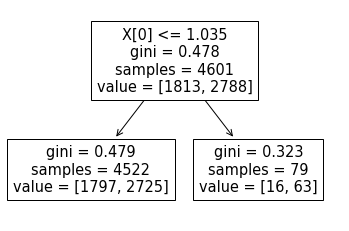

In [24]:
#plotting tree for round 2 boosting
tree.plot_tree(clf)

In [25]:
example_SpamEmail

,make,address,all,3d,our,over,remove,internet,order,mail,...,pound,cap_avg,cap_long,cap_total,Label,weight,PredictionClass,misclassification,newWeight,PredictionClass_2
0,0.00,0.00,0.29,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,1.666,10,180,1,0.000217,1,0.0,0.0001,1
1,0.46,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,1.510,10,74,1,0.000217,1,0.0,0.0001,1
2,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,1.718,11,55,1,0.000217,1,0.0,0.0001,1
3,0.33,0.44,0.37,0.0,0.14,0.11,0.00,0.07,0.97,1.16,...,0.11,3.426,72,819,-1,0.000217,-1,0.0,0.0001,1
4,0.00,2.08,0.00,0.0,3.12,0.00,1.04,0.00,0.00,0.00,...,0.00,1.428,4,20,-1,0.000217,1,1.0,0.0005,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.00,0.00,0.53,0.0,0.00,0.53,0.00,0.00,0.00,0.53,...,0.00,1.857,16,52,1,0.000217,1,0.0,0.0001,1
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,3.812,15,61,-1,0.000217,-1,0.0,0.0001,1
4598,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,1.000,1,3,1,0.000217,1,0.0,0.0001,1
4599,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,1.687,10,27,1,0.000217,1,0.0,0.0001,1


In [26]:
#misclassified = 0 if the label and prediction are same
#Phân biệt cây học yếu với cây học mạnh
example_SpamEmail.loc[example_SpamEmail.Label != example_SpamEmail.PredictionClass_2, 'misclassification2'] = 1
example_SpamEmail.loc[example_SpamEmail.Label == example_SpamEmail.PredictionClass_2, 'misclassification2'] = 0

In [27]:
#error calculation
error2 = sum(example_SpamEmail['misclassification2'] * example_SpamEmail['newWeight'])
error2

0.5076999999999918

In [28]:
#calculation of alpha (performance)
#error không bao giờ vượt quá 1
alpha2 = 0.5*log((1-error2)/error2)
alpha2

-0.015401217594580515

In [29]:
#update weight
newWeight_2 = example_SpamEmail['newWeight']*np.exp(-1*alpha2*example_SpamEmail['Label']*example_SpamEmail['PredictionClass_2'])

In [30]:
#normalized weight
t = sum(newWeight_2)
normalizedWeight_2 = newWeight_2/sum(newWeight_2)

In [31]:
#Update trọng số mới và tập dữ liệu
#4 là lấy 4 số sau dấu phẩy
example_SpamEmail['newWeight_2'] = round(normalizedWeight_2,4)
example_SpamEmail

,make,address,all,3d,our,over,remove,internet,order,mail,...,cap_long,cap_total,Label,weight,PredictionClass,misclassification,newWeight,PredictionClass_2,misclassification2,newWeight_2
0,0.00,0.00,0.29,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,10,180,1,0.000217,1,0.0,0.0001,1,0.0,0.0001
1,0.46,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,10,74,1,0.000217,1,0.0,0.0001,1,0.0,0.0001
2,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,11,55,1,0.000217,1,0.0,0.0001,1,0.0,0.0001
3,0.33,0.44,0.37,0.0,0.14,0.11,0.00,0.07,0.97,1.16,...,72,819,-1,0.000217,-1,0.0,0.0001,1,1.0,0.0001
4,0.00,2.08,0.00,0.0,3.12,0.00,1.04,0.00,0.00,0.00,...,4,20,-1,0.000217,1,1.0,0.0005,1,1.0,0.0006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.00,0.00,0.53,0.0,0.00,0.53,0.00,0.00,0.00,0.53,...,16,52,1,0.000217,1,0.0,0.0001,1,0.0,0.0001
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,15,61,-1,0.000217,-1,0.0,0.0001,1,1.0,0.0001
4598,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,1,3,1,0.000217,1,0.0,0.0001,1,0.0,0.0001
4599,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,10,27,1,0.000217,1,0.0,0.0001,1,0.0,0.0001


In [32]:
#round 3
random.seed(20)
example_SpamEmail_3 = example_SpamEmail.sample(len(example_SpamEmail), replace = True, weights = example_SpamEmail['newWeight_2'])
example_SpamEmail_3 = example_SpamEmail_3.iloc[:,0:57]
#Đưa vào train thì chỉ đưa 15 thuộc tính phân loại
X_train = example_SpamEmail_3.iloc[0:len(spamEmail),0:56]
#y_train chứa thuộc tính mục tiêu nằm ở 16 binarylabel
y_train = example_SpamEmail.iloc[0:len(spamEmail),57]

clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=1)
clf = clf_gini.fit(X_train, y_train)

#y_pred là dự đoán phân loại, predict đưa vào x test
y_pred = clf_gini.predict(example_SpamEmail.iloc[0:len(spamEmail),0:56])
#adding a column pred2 after the second round of boosting
example_SpamEmail['PredictionClass_3'] = y_pred

[Text(0.5, 0.75, 'X[3] <= 0.575\ngini = 0.478\nsamples = 4601\nvalue = [1813, 2788]'),
 Text(0.25, 0.25, 'gini = 0.477\nsamples = 4559\nvalue = [1787, 2772]'),
 Text(0.75, 0.25, 'gini = 0.472\nsamples = 42\nvalue = [26, 16]')]

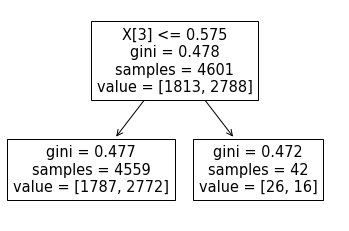

In [33]:
#plotting tree for round 2 boosting
tree.plot_tree(clf)

In [34]:
example_SpamEmail

,make,address,all,3d,our,over,remove,internet,order,mail,...,cap_total,Label,weight,PredictionClass,misclassification,newWeight,PredictionClass_2,misclassification2,newWeight_2,PredictionClass_3
0,0.00,0.00,0.29,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,180,1,0.000217,1,0.0,0.0001,1,0.0,0.0001,1
1,0.46,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,74,1,0.000217,1,0.0,0.0001,1,0.0,0.0001,1
2,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,55,1,0.000217,1,0.0,0.0001,1,0.0,0.0001,1
3,0.33,0.44,0.37,0.0,0.14,0.11,0.00,0.07,0.97,1.16,...,819,-1,0.000217,-1,0.0,0.0001,1,1.0,0.0001,1
4,0.00,2.08,0.00,0.0,3.12,0.00,1.04,0.00,0.00,0.00,...,20,-1,0.000217,1,1.0,0.0005,1,1.0,0.0006,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.00,0.00,0.53,0.0,0.00,0.53,0.00,0.00,0.00,0.53,...,52,1,0.000217,1,0.0,0.0001,1,0.0,0.0001,1
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,61,-1,0.000217,-1,0.0,0.0001,1,1.0,0.0001,1
4598,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,3,1,0.000217,1,0.0,0.0001,1,0.0,0.0001,1
4599,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,27,1,0.000217,1,0.0,0.0001,1,0.0,0.0001,1


In [35]:
#misclassified = 0 if the label and prediction are same
#Phân biệt cây học yếu với cây học mạnh
example_SpamEmail.loc[example_SpamEmail.Label != example_SpamEmail.PredictionClass_3, 'misclassification3'] = 1
example_SpamEmail.loc[example_SpamEmail.Label == example_SpamEmail.PredictionClass_3, 'misclassification3'] = 0

In [36]:
#error calculation
error3 = sum(example_SpamEmail['misclassification'] * example_SpamEmail['newWeight_2'])
error3

0.5693999999999991

In [37]:
#calculation of alpha (performance)
#error không bao giờ vượt quá 1
alpha3 = 0.5*log((1-error3)/error3)
alpha3

-0.13970179495683552

In [49]:
print(alpha1)
print(alpha2)
print(alpha3)

0.6738107215524545
-0.015401217594580515
-0.13970179495683552


In [50]:
t = alpha1 * example_SpamEmail['weight'] + alpha2 * example_SpamEmail['newWeight'] + alpha3 * example_SpamEmail['newWeight_2']
#sign of the final prediction
np.sign(list(t))

array([1., 1., 1., ..., 1., 1., 1.])

In [51]:
example_SpamEmail['final_weight'] = np.sign(list(t))
example_SpamEmail

,make,address,all,3d,our,over,remove,internet,order,mail,...,PredictionClass,misclassification,newWeight,PredictionClass_2,misclassification2,newWeight_2,PredictionClass_3,misclassification3,newWeight_3,final_weight
0,0.00,0.00,0.29,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,1,0.0,0.0001,1,0.0,0.0001,1,0.0,0.0001,1.0
1,0.46,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,1,0.0,0.0001,1,0.0,0.0001,1,0.0,0.0001,1.0
2,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,1,0.0,0.0001,1,0.0,0.0001,1,0.0,0.0001,1.0
3,0.33,0.44,0.37,0.0,0.14,0.11,0.00,0.07,0.97,1.16,...,-1,0.0,0.0001,1,1.0,0.0001,1,1.0,0.0001,1.0
4,0.00,2.08,0.00,0.0,3.12,0.00,1.04,0.00,0.00,0.00,...,1,1.0,0.0005,1,1.0,0.0006,1,1.0,0.0006,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.00,0.00,0.53,0.0,0.00,0.53,0.00,0.00,0.00,0.53,...,1,0.0,0.0001,1,0.0,0.0001,1,0.0,0.0001,1.0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,-1,0.0,0.0001,1,1.0,0.0001,1,1.0,0.0001,1.0
4598,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,1,0.0,0.0001,1,0.0,0.0001,1,0.0,0.0001,1.0
4599,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,1,0.0,0.0001,1,0.0,0.0001,1,0.0,0.0001,1.0


In [53]:
#Confusion matrix
c=confusion_matrix(example_SpamEmail['Label'], example_SpamEmail['final_weight'])
c

array([[   0, 1813],
       [   0, 2788]], dtype=int64)

In [54]:
#Overall Accuracy
(c[0,0]+c[1,1])/np.sum(c)*100

60.59552271245382

In [41]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

y=le.fit_transform(y)

In [42]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [43]:
# Import the AdaBoost classifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

dt_stump = DecisionTreeClassifier(max_depth=1, min_samples_leaf=1)
dt_stump.fit(X_train, y_train)
dt_stump_err = 1.0 - dt_stump.score(X_test, y_test)

# Create adaboost classifer object
spamEmailObject = AdaBoostClassifier(base_estimator=dt_stump, learning_rate=1, n_estimators=50, random_state=0)

# Train Adaboost Classifer
modelSpamEmail = spamEmailObject.fit(X_train, y_train)

#Predict the response for test dataset
y_spamEmail = modelSpamEmail.predict(X_test)

In [44]:
#import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import accuracy_score

# calculate and print model accuracy
print("AdaBoost Classifier Model Accuracy:", accuracy_score(y_test, y_spamEmail))

AdaBoost Classifier Model Accuracy: 0.9429657794676806


In [45]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_spamEmail))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1117
           1       0.94      0.92      0.93       724

    accuracy                           0.94      1841
   macro avg       0.94      0.94      0.94      1841
weighted avg       0.94      0.94      0.94      1841



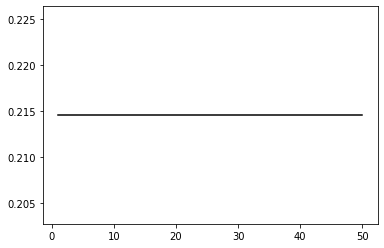

In [46]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot([1, 50], [dt_stump_err] * 2, "k-", label="Decision Stump Error")

In [47]:
from sklearn.metrics import zero_one_loss

ada_train_error = np.zeros((50,), dtype=np.float64)
for i, y_pred in enumerate(modelSpamEmail.staged_predict(X_train)):
    ada_train_error[i] = zero_one_loss(y_pred, y_train)
    
test_score = np.zeros((50,), dtype=np.float64)
for i, y_pred in enumerate(modelSpamEmail.staged_predict(X_test)):
    test_score[i] = zero_one_loss(y_test, y_pred)

C:\Users\phant\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\phant\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


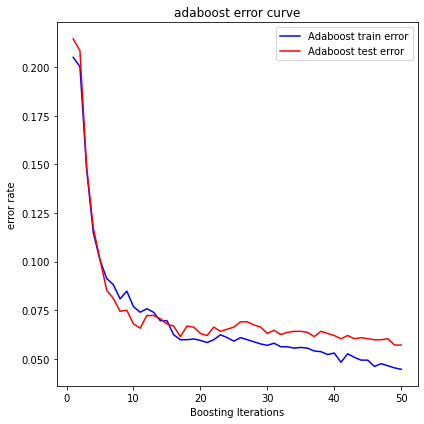

In [48]:
fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title("adaboost error curve")

plt.plot(
    np.arange(50) + 1,
    ada_train_error,
    "b-",
    label="Adaboost train error",
)

plt.plot(
    np.arange(50) + 1, test_score, "r-", label="Adaboost test error"
)


plt.legend(loc="upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("error rate")
fig.tight_layout()
plt.show()